<a href="https://colab.research.google.com/github/Patri04/PyTorch-Course/blob/main/2_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**


**Workflow steps:**

- Data preparation
- Model choosing / building
- Training model
- Making prediction
- Evaluating model
- Improving model trough experiments
- Saving and deploying model

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

**1) Data preparation and visualization**

Data can be anything, anything can be represented with a tensor.

*Example: linear regression model V0*

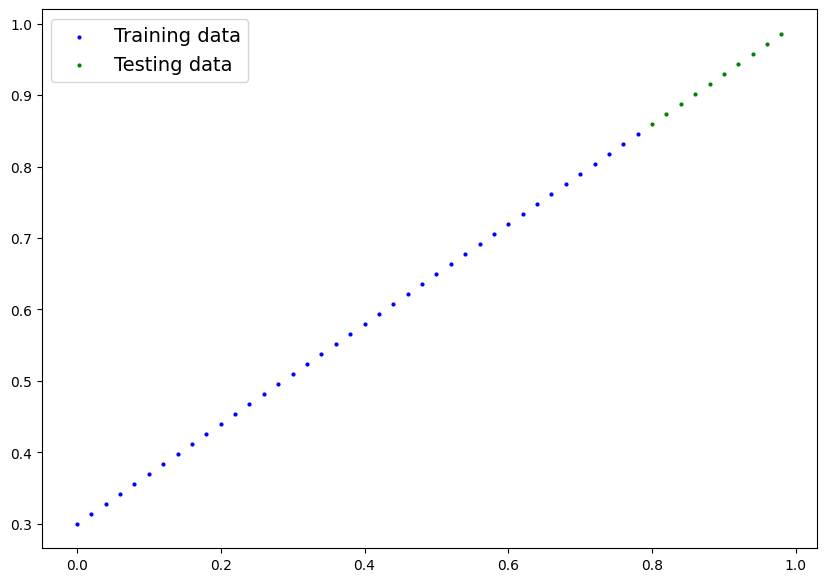

In [ ]:
#Creating data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)    #input
Y = weight * X + bias                                  #target output

#Splitting data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]    #training set
X_test, Y_test = X[train_split:], Y[train_split:]      #test set

#Plotting data
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")

  plt.legend(prop = {"size":14})
  plt.show()


plot_predictions(X_train, Y_train, X_test, Y_test)

**2) Model building:**

PyTorch framework gives us useful tools to build a model:

- torch.nn: contains all building blocks for neural networks
- torch.nn.Module: every model should be a subclass of it to inheritate its properties
- torch.nn.Parameters: defines which parameters should model learn
- torch.optim: contains optimizers to help with gradient descent
- def.forward(): requires forward function of the model

*Model example: linear regression model*

In [ ]:
#Creating model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #Initializing parameters
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float))   #weights (requires_grad = True means that parameters can be updated with gradient descent)
    self.bias = nn.Parameter(torch.randn(1, requires_grad= True, dtype = torch.float))       #bias

  #Defining computations in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:    #forward propagation
    return self.weights * x + self.bias

In [ ]:
#Checking what's inside the model
torch.manual_seed(42)
model0 = LinearRegressionModel()

list(model0.parameters())            #checking parameters

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

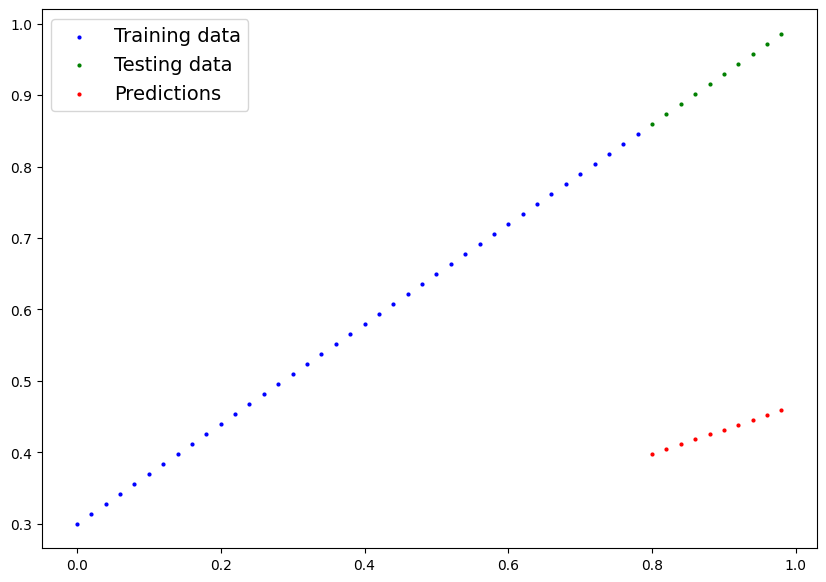

In [ ]:
#Making predictions with torch.inference_mode()
with torch.inference_mode():
  Y_preds = model0(X_test)
  plot_predictions(X_train, Y_train, X_test, Y_test, Y_preds)

**3) Model training and testing:**

We have to setup a loss function to minimize with an optimizer, PyTorch has pre-built loss functions and optimizers.

Then we have to build a training loop where we minimize the loss using training data, on a single training data we do these operations:
1. Forward propagation
2. Loss calculation
3. Backward propagation
4. Optimization

In [ ]:
#Setup a loss function (mean absolute error)
loss_fn = nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params = model0.parameters(), lr = 0.01)

In [ ]:
#Defining number of epochs
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

In [ ]:
#Training and testing loop
for epoch in torch.arange(epochs):
  #Setting model to train mode
  model0.train()

  #1. Forward propagation
  Y_preds = model0(X_train)

  #2. Loss calculation
  loss = loss_fn(Y_preds, Y_train)

  #3. Backward propagation
  optimizer.zero_grad()
  loss.backward()

  #4. Optimization
  optimizer.step()



  #Setting model to test mode
  model0.eval()

  with torch.inference_mode():

    #1. Forward propagation
    test_pred = model0(X_test)

    #2. Loss calculation
    test_loss = loss_fn(test_pred, Y_test)



  #Keeping track of what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} |Loss: {loss}| Test loss: {test_loss}")
    print(model0.state_dict())


Epoch:0 |Loss: 0.31288138031959534| Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 |Loss: 0.1976713240146637| Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 |Loss: 0.08908725529909134| Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 |Loss: 0.053148526698350906| Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 |Loss: 0.04543796554207802| Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 |Loss: 0.04167863354086876| Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 |Loss: 0.03818932920694351| Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:70 |Loss:

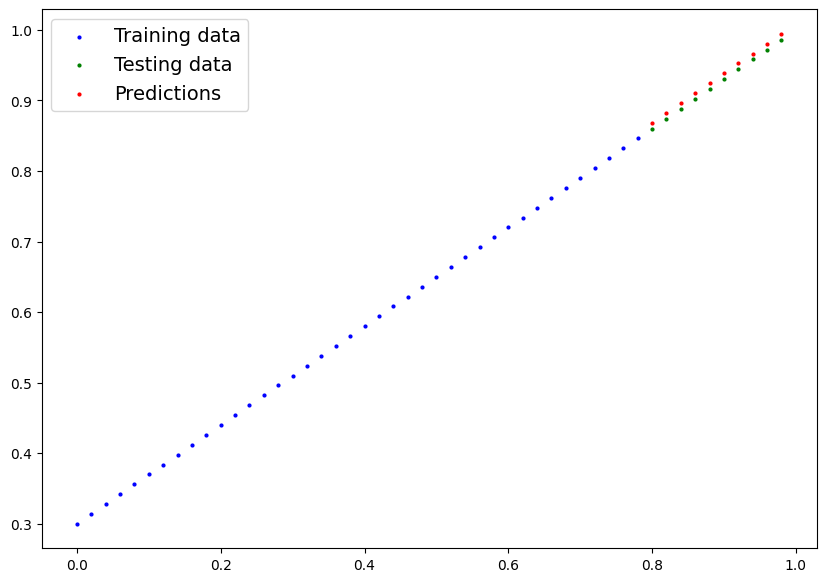

In [ ]:
#Seeing how prediction is better after the model training
with torch.inference_mode():
  Y_preds_new = model0(X_test)
  plot_predictions(X_train, Y_train, X_test, Y_test, Y_preds_new)

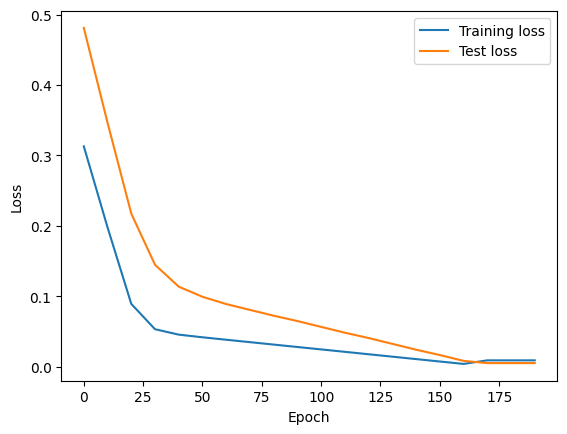

In [ ]:
#Plotting model training process
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Training loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

**4) Model saving and loading:**

Most popular ways to save and load a model:
- `torch.save()`: save a PyTorch object in Python's pickle format
- `torch.load()`: load a PyTorch object
- `torch.nn.Module.load_state_dict()`: load a model's saved state dictionary

It's really important to save the model's state dict, a structure which contains model layers and parameters.

In [ ]:
#Saving a model
from pathlib import Path

#1. Create models directory
model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)

#2. Create model save path
model_name = "model0.pth"
model_save_path = model_path / model_name

#3. Save the model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj = model0.state_dict(), f = model_save_path)

Saving model to: models/model0.pth


In [ ]:
#Loading a model

#1. Create a new istance for the model
loaded_model0 = LinearRegressionModel()

#2.Load the model's state dict
loaded_model0.load_state_dict(torch.load(f = model_save_path))

<ipython-input-12-fd9ee2f83359>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model0.load_state_dict(torch.load(f = model_save_path))


<All keys matched successfully>

**Model with PyTorch, all together**

*Example: linear regression model V1*

In [ ]:
#Setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
#Import libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

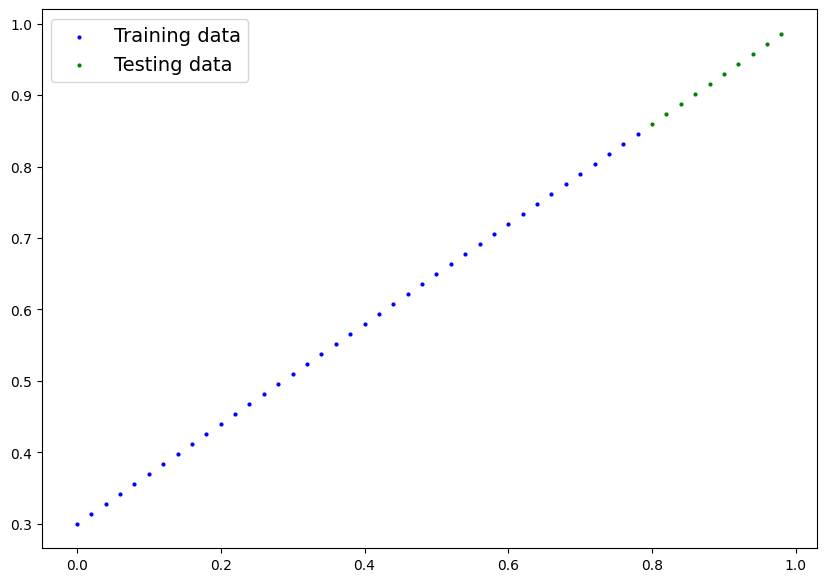

In [ ]:
#Data creation and manipulation
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)                             #input
Y = weight * X + bias                                                           #target output

train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]                             #training set
X_test, Y_test = X[train_split:], Y[train_split:]                               #test set

plot_predictions(X_train, Y_train, X_test, Y_test)

In [ ]:
#Model building
class LinearRegressionModelV2(nn.Module):                                       #model class creation
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)            #creates parameters and forward function

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)                                                           #model creation
model1 = LinearRegressionModelV2()
model1.to(device)
model1.state_dict()                                                             #NOT TRAINED MODEL

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
#Model training
loss_fn = nn.L1Loss()                                                           #Loss function
optimizer = torch.optim.SGD(params = model1.parameters(), lr = 0.01)            #Optimization method

X_train = X_train.to(device)                                                    #Data on the same device of the model
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)

epochs = 200
for epoch in torch.arange(epochs):                                              #Training loop
  model1.train()

  Y_preds = model1(X_train)
  loss = loss_fn(Y_preds, Y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print(f"Loss: {loss}")

model1.state_dict()                                                             #TRAINED MODEL

Loss: 0.5551779866218567
Loss: 0.4399680495262146
Loss: 0.3247582018375397
Loss: 0.20954827964305878
Loss: 0.09433844685554504
Loss: 0.023886386305093765
Loss: 0.0199567973613739
Loss: 0.016517987474799156
Loss: 0.013089170679450035
Loss: 0.009653178043663502
Loss: 0.006215679459273815
Loss: 0.002787243574857712
Loss: 0.0012645035749301314
Loss: 0.0012645035749301314
Loss: 0.0012645035749301314
Loss: 0.0012645035749301314
Loss: 0.0012645035749301314
Loss: 0.0012645035749301314
Loss: 0.0012645035749301314
Loss: 0.0012645035749301314


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

Test loss: 0.0003308236482553184


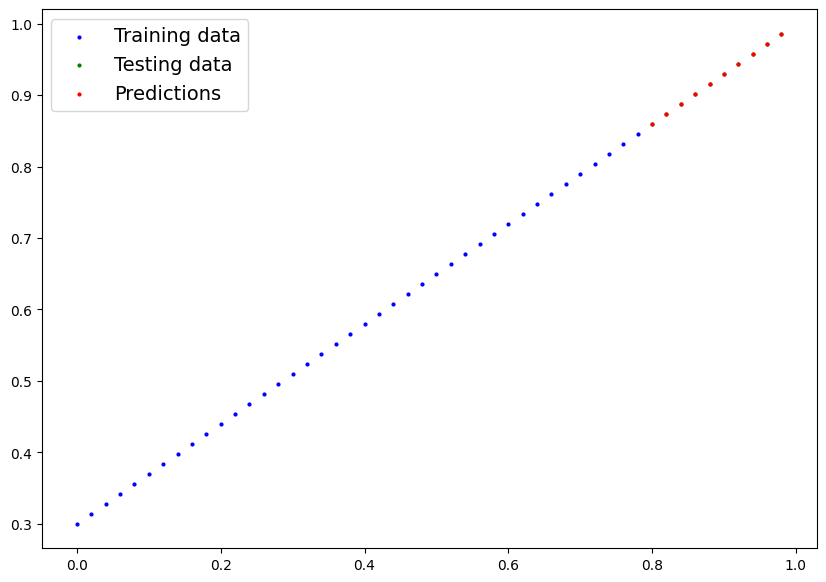

In [ ]:
#Model testing
model1.eval()
with torch.inference_mode():
  test_preds = model1(X_test)
  test_loss = loss_fn(test_preds, Y_test)
  print(f"Test loss: {test_loss}")

plot_predictions(X_train.cpu(), Y_train.cpu(), X_test.cpu(), Y_test.cpu(), test_preds.cpu())

In [ ]:
#Model saving
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)
MODEL_NAME = "model1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj = model1.state_dict(), f = MODEL_SAVE_PATH)

In [ ]:
#Model loading
loaded_model1 = LinearRegressionModelV2()
loaded_model1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model1.to(device)

<ipython-input-20-90b24ef03448>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model1.load_state_dict(torch.load(f = MODEL_SAVE_PATH))


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)